In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf


# Set a fixed random seed value, for reproducibility
SEED = 2137
np.random.seed(SEED)
tf.random.set_seed(SEED)

# list of exercises files
EXERCISES = [
    "biceps_curl_1",
    "triceps_ext",
    "noise2",
    "shoulder_side",
    "shoulder_front"
]
dataset_path = "/home/trep/data"

SAMPLES_PER_EXERCISES = 297

NUM_OF_EXERCISES = len(EXERCISES)

# output matrix
ONE_HOT_ENCODED_EXERCISES = np.eye(NUM_OF_EXERCISES)

inputs = []
outputs = []

# reading every csv file and putting it into input and output
for exercise_index in range(NUM_OF_EXERCISES):
  gesture = EXERCISES[exercise_index]
  print(f"Processing index {exercise_index} for gesture '{gesture}'.")
  
  output = ONE_HOT_ENCODED_EXERCISES[exercise_index]
  
  df = pd.read_csv("/home/trep/data/" + gesture + ".csv")
  
  # calculate the number of gesture recordings in the file
  num_recordings = int(df.shape[0] / SAMPLES_PER_EXERCISES)
  
  print(f"\tThere are {num_recordings} recordings of the {gesture} exercise.")
  
  for i in range(num_recordings):
    tensor = []
    for j in range(SAMPLES_PER_EXERCISES):
      index = i * SAMPLES_PER_EXERCISES + j
      # normalize the input data, between 0 to 1:
      # - acceleration is between: -4 to +4
      # - gyroscope is between: -2000 to +2000
      tensor += [
          (df['aX'][index] + 4) / 8,
          (df['aY'][index] + 4) / 8,
          (df['aZ'][index] + 4) / 8,
          (df['gX'][index] + 2000) / 4000,
          (df['gY'][index] + 2000) / 4000,
          (df['gZ'][index] + 2000) / 4000
      ]

    inputs.append(tensor)
    outputs.append(output)

inputs = np.array(inputs)
outputs = np.array(outputs)


Processing index 0 for gesture 'biceps_curl_1'.
	There are 59 recordings of the biceps_curl_1 exercise.
Processing index 1 for gesture 'triceps_ext'.
	There are 52 recordings of the triceps_ext exercise.
Processing index 2 for gesture 'noise2'.
	There are 31 recordings of the noise2 exercise.
Processing index 3 for gesture 'shoulder_side'.
	There are 57 recordings of the shoulder_side exercise.
Processing index 4 for gesture 'shoulder_front'.
	There are 75 recordings of the shoulder_front exercise.


In [25]:
# Randomize the order of the inputs, so they can be evenly distributed for training, testing, and validation
num_inputs = len(inputs)
randomize = np.arange(num_inputs)
np.random.shuffle(randomize)
# Swap the consecutive indexes with the randomized indexes
inputs = inputs[randomize]
outputs = outputs[randomize]
# Split into three sets: training, testing and validation
TRAIN_SPLIT = int(0.6 * num_inputs)
TEST_SPLIT = int(0.2 * num_inputs + TRAIN_SPLIT)
inputs_train, inputs_test, inputs_validate = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
outputs_train, outputs_test, outputs_validate = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

print("done")

Data set randomization and splitting complete.


In [40]:
# build the model and train it
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation='relu')) 
model.add(tf.keras.layers.Dense(NUM_OF_EXERCISES, activation='softmax')) 
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(inputs_train, outputs_train, epochs=700, batch_size=1, validation_data=(inputs_validate, outputs_validate))
model.save('/home/trep/data/keras_model')

Epoch 1/700
164/164 [==============================] - 0s 1ms/step - loss: 0.2161 - mae: 0.3034 - val_loss: 0.1668 - val_mae: 0.3087
Epoch 2/700
164/164 [==============================] - 0s 1ms/step - loss: 0.1650 - mae: 0.3096 - val_loss: 0.1578 - val_mae: 0.3143
Epoch 3/700
164/164 [==============================] - 0s 1ms/step - loss: 0.1553 - mae: 0.3058 - val_loss: 0.1508 - val_mae: 0.3044
Epoch 4/700
164/164 [==============================] - 0s 1ms/step - loss: 0.1508 - mae: 0.3004 - val_loss: 0.1484 - val_mae: 0.2990
Epoch 5/700
164/164 [==============================] - 0s 1ms/step - loss: 0.1467 - mae: 0.2945 - val_loss: 0.1616 - val_mae: 0.2866
Epoch 6/700
164/164 [==============================] - 0s 1ms/step - loss: 0.1428 - mae: 0.2893 - val_loss: 0.1380 - val_mae: 0.2836
Epoch 7/700
164/164 [==============================] - 0s 1ms/step - loss: 0.1339 - mae: 0.2751 - val_loss: 0.1381 - val_mae: 0.2878
Epoch 8/700
164/164 [==============================] - 0s 1ms/step - 

164/164 [==============================] - 0s 1ms/step - loss: 0.0091 - mae: 0.0304 - val_loss: 0.0014 - val_mae: 0.0163
Epoch 124/700
164/164 [==============================] - 0s 1ms/step - loss: 0.0095 - mae: 0.0275 - val_loss: 0.0018 - val_mae: 0.0176
Epoch 125/700
164/164 [==============================] - 0s 1ms/step - loss: 0.0081 - mae: 0.0267 - val_loss: 0.0028 - val_mae: 0.0193
Epoch 126/700
164/164 [==============================] - 0s 1ms/step - loss: 0.0083 - mae: 0.0268 - val_loss: 0.0016 - val_mae: 0.0156
Epoch 127/700
164/164 [==============================] - 0s 1ms/step - loss: 0.0074 - mae: 0.0260 - val_loss: 0.0096 - val_mae: 0.0378
Epoch 128/700
164/164 [==============================] - 0s 1ms/step - loss: 0.0094 - mae: 0.0292 - val_loss: 0.0034 - val_mae: 0.0211
Epoch 129/700
164/164 [==============================] - 0s 1ms/step - loss: 0.0087 - mae: 0.0260 - val_loss: 0.0033 - val_mae: 0.0205
Epoch 130/700
164/164 [==============================] - 0s 1ms/step 

164/164 [==============================] - 0s 1ms/step - loss: 0.0033 - mae: 0.0121 - val_loss: 4.0133e-04 - val_mae: 0.0064
Epoch 243/700
164/164 [==============================] - 0s 1ms/step - loss: 0.0058 - mae: 0.0155 - val_loss: 8.1565e-04 - val_mae: 0.0098
Epoch 244/700
164/164 [==============================] - 0s 1ms/step - loss: 0.0060 - mae: 0.0170 - val_loss: 1.2606e-04 - val_mae: 0.0045
Epoch 245/700
164/164 [==============================] - 0s 1ms/step - loss: 0.0035 - mae: 0.0142 - val_loss: 2.6026e-04 - val_mae: 0.0053
Epoch 246/700
164/164 [==============================] - 0s 1ms/step - loss: 0.0024 - mae: 0.0108 - val_loss: 0.0203 - val_mae: 0.0476
Epoch 247/700
164/164 [==============================] - 0s 1ms/step - loss: 0.0064 - mae: 0.0166 - val_loss: 0.0014 - val_mae: 0.0102
Epoch 248/700
164/164 [==============================] - 0s 1ms/step - loss: 0.0075 - mae: 0.0164 - val_loss: 0.0025 - val_mae: 0.0143
Epoch 249/700
164/164 [==============================

164/164 [==============================] - 0s 1ms/step - loss: 0.0071 - mae: 0.0135 - val_loss: 2.5276e-04 - val_mae: 0.0046
Epoch 361/700
164/164 [==============================] - 0s 1ms/step - loss: 0.0044 - mae: 0.0117 - val_loss: 0.0138 - val_mae: 0.0359
Epoch 362/700
164/164 [==============================] - 0s 1ms/step - loss: 0.0049 - mae: 0.0118 - val_loss: 0.0018 - val_mae: 0.0083
Epoch 363/700
164/164 [==============================] - 0s 1ms/step - loss: 0.0050 - mae: 0.0129 - val_loss: 0.0016 - val_mae: 0.0080
Epoch 364/700
164/164 [==============================] - 0s 1ms/step - loss: 0.0057 - mae: 0.0127 - val_loss: 0.0010 - val_mae: 0.0091
Epoch 365/700
164/164 [==============================] - 0s 1ms/step - loss: 0.0043 - mae: 0.0119 - val_loss: 0.0018 - val_mae: 0.0126
Epoch 366/700
164/164 [==============================] - 0s 1ms/step - loss: 0.0087 - mae: 0.0137 - val_loss: 6.8890e-05 - val_mae: 0.0029
Epoch 367/700
164/164 [==============================] - 0s 1

164/164 [==============================] - 0s 1ms/step - loss: 0.0052 - mae: 0.0135 - val_loss: 2.8436e-04 - val_mae: 0.0048
Epoch 479/700
164/164 [==============================] - 0s 1ms/step - loss: 0.0068 - mae: 0.0130 - val_loss: 0.0019 - val_mae: 0.0089
Epoch 480/700
164/164 [==============================] - 0s 1ms/step - loss: 0.0020 - mae: 0.0054 - val_loss: 5.3901e-05 - val_mae: 0.0021
Epoch 481/700
164/164 [==============================] - 0s 1ms/step - loss: 0.0074 - mae: 0.0122 - val_loss: 2.6899e-05 - val_mae: 0.0018
Epoch 482/700
164/164 [==============================] - 0s 1ms/step - loss: 0.0026 - mae: 0.0063 - val_loss: 8.2465e-05 - val_mae: 0.0026
Epoch 483/700
164/164 [==============================] - 0s 1ms/step - loss: 0.0029 - mae: 0.0095 - val_loss: 5.6425e-05 - val_mae: 0.0021
Epoch 484/700
164/164 [==============================] - 0s 1ms/step - loss: 0.0059 - mae: 0.0141 - val_loss: 4.4420e-04 - val_mae: 0.0058
Epoch 485/700
164/164 [======================

164/164 [==============================] - 0s 1ms/step - loss: 0.0043 - mae: 0.0074 - val_loss: 5.3313e-06 - val_mae: 8.4807e-04
Epoch 597/700
164/164 [==============================] - 0s 1ms/step - loss: 0.0031 - mae: 0.0073 - val_loss: 9.3600e-05 - val_mae: 0.0031
Epoch 598/700
164/164 [==============================] - 0s 1ms/step - loss: 0.0064 - mae: 0.0107 - val_loss: 0.0479 - val_mae: 0.0789
Epoch 599/700
164/164 [==============================] - 0s 1ms/step - loss: 0.0061 - mae: 0.0116 - val_loss: 8.2631e-05 - val_mae: 0.0021
Epoch 600/700
164/164 [==============================] - 0s 1ms/step - loss: 0.0030 - mae: 0.0072 - val_loss: 8.4680e-05 - val_mae: 0.0024
Epoch 601/700
164/164 [==============================] - 0s 1ms/step - loss: 0.0042 - mae: 0.0089 - val_loss: 6.4787e-06 - val_mae: 9.5531e-04
Epoch 602/700
164/164 [==============================] - 0s 1ms/step - loss: 0.0020 - mae: 0.0077 - val_loss: 3.8291e-06 - val_mae: 8.3351e-04
Epoch 603/700
164/164 [==========

Epoch 655/700
164/164 [==============================] - 0s 1ms/step - loss: 0.0046 - mae: 0.0085 - val_loss: 9.1211e-06 - val_mae: 8.8311e-04
Epoch 656/700
164/164 [==============================] - 0s 1ms/step - loss: 5.1629e-04 - mae: 0.0040 - val_loss: 0.0048 - val_mae: 0.0104
Epoch 657/700
164/164 [==============================] - 0s 1ms/step - loss: 0.0032 - mae: 0.0096 - val_loss: 1.5684e-04 - val_mae: 0.0028
Epoch 658/700
164/164 [==============================] - 0s 1ms/step - loss: 0.0069 - mae: 0.0127 - val_loss: 1.6245e-05 - val_mae: 0.0012
Epoch 659/700
164/164 [==============================] - 0s 1ms/step - loss: 0.0030 - mae: 0.0080 - val_loss: 1.2412e-05 - val_mae: 9.7595e-04
Epoch 660/700
164/164 [==============================] - 0s 1ms/step - loss: 0.0026 - mae: 0.0049 - val_loss: 6.9563e-06 - val_mae: 9.2683e-04
Epoch 661/700
164/164 [==============================] - 0s 1ms/step - loss: 0.0045 - mae: 0.0080 - val_loss: 4.1130e-06 - val_mae: 6.8850e-04
Epoch 662/7

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


INFO:tensorflow:Assets written to: /home/trep/data/keras_model/assets


INFO:tensorflow:Assets written to: /home/trep/data/keras_model/assets


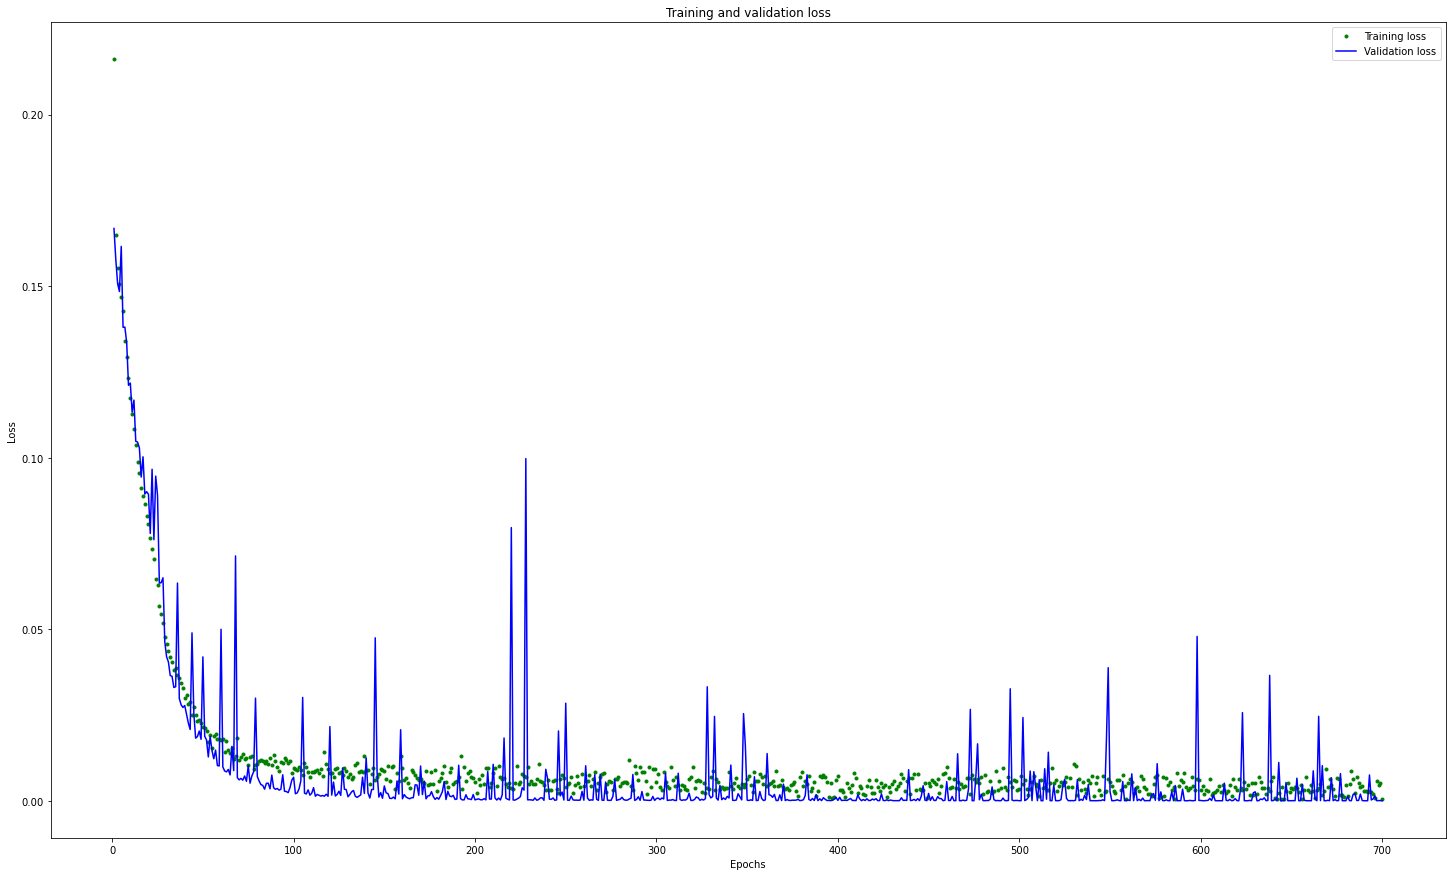

[25.0, 15.0]


In [33]:

plt.rcParams["figure.figsize"] = (25,15)

# graph the loss, the model above is configure to use "mean squared error" as the loss function
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(plt.rcParams["figure.figsize"])

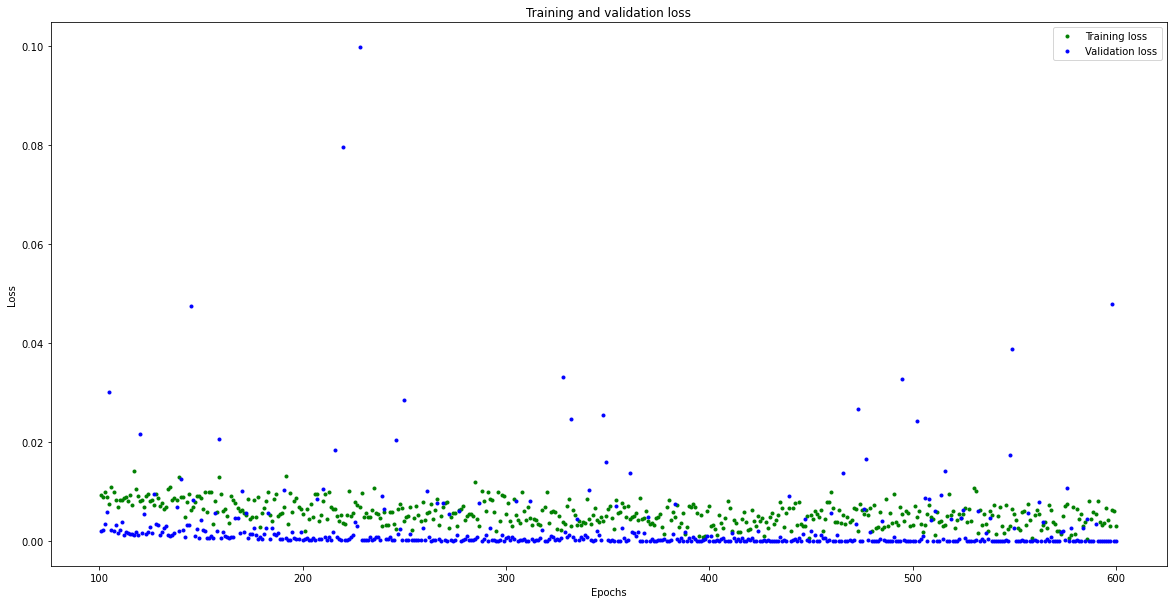

In [50]:
# graph the loss again skipping a bit of the start
SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

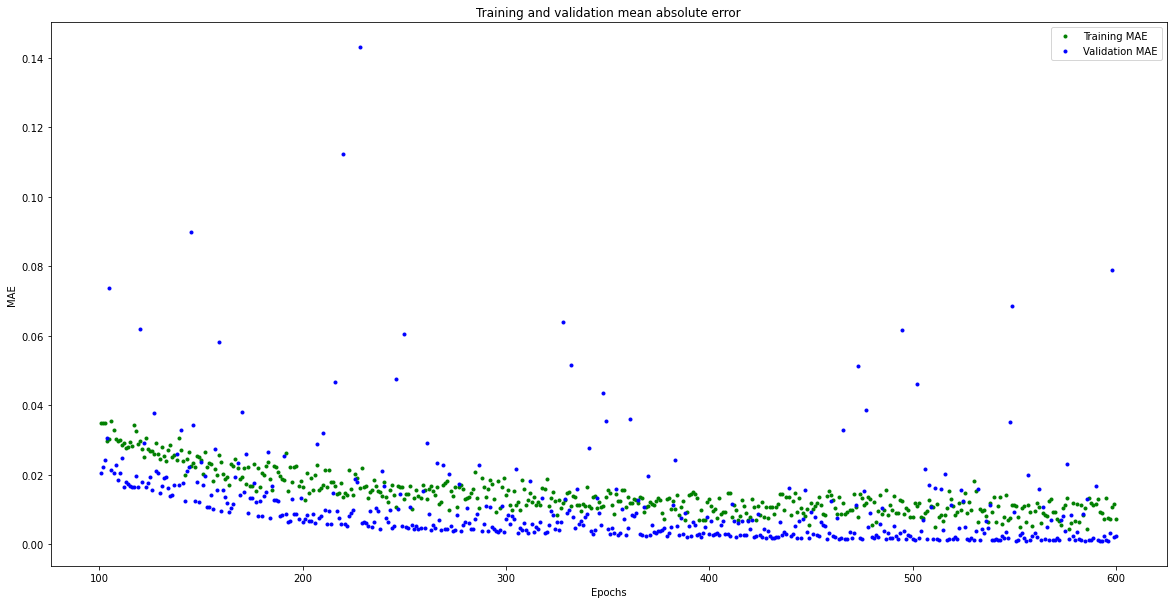

In [51]:
# graph of mean absolute error
mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [38]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)

#optimizing
#converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_model = converter.convert()

open("exercise_model.tflite", "wb").write(tflite_model)
  
import os
basic_model_size = os.path.getsize("exercise_model.tflite")
print("Model is %d bytes" % basic_model_size)

Model is 358844 bytes


In [39]:
!echo "const unsigned char model[] = {" > /home/trep/data/model.h
!cat exercise_model.tflite | xxd -i      >> /home/trep/data/model.h
!echo "};"                              >> /home/trep/data/model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")

Header file, model.h, is 2,212,906 bytes.
